<a href="https://colab.research.google.com/github/njokinjuguna/Machine-learning-Models/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import**

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv("https://raw.githubusercontent.com/imhardikj/A-Model-a-Day/master/K-Nearest%20Neighbors/Classified%20Data.csv",index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


## x and y defined

In [98]:
X=df.drop(['TARGET CLASS'],axis=1)
print(X)

          WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  
0    0.643798  0.879422  1.231409  
1  

In [99]:
Y=df['TARGET CLASS']
print(Y)

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64


## **Data split**

In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=100);

## **Standardize the x**

In [101]:
scaler=StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


## **train the model**

In [102]:
knn=KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train_scaled,Y_train)

KNeighborsClassifier(n_neighbors=31)

## **predict**

In [103]:
y_predict=knn.predict(X_test_scaled)

print("Accuracy of model at K=31 is")
print("----------------------------")
print(metrics.accuracy_score(Y_test, y_predict))

print("classification report of model at K=31 is")
print("-----------------------------------------")
print(classification_report(Y_test, y_predict))

print("confusion matrix of model at K=31 is")
print("------------------------------------")
print(confusion_matrix(Y_test,y_predict))

Accuracy of model at K=31 is
----------------------------
0.925
classification report of model at K=31 is
-----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       110
           1       0.88      0.97      0.92        90

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

confusion matrix of model at K=31 is
------------------------------------
[[98 12]
 [ 3 87]]


## **Optimizing K using the elbow method**


Minimum error:- 0.07 at K = 31


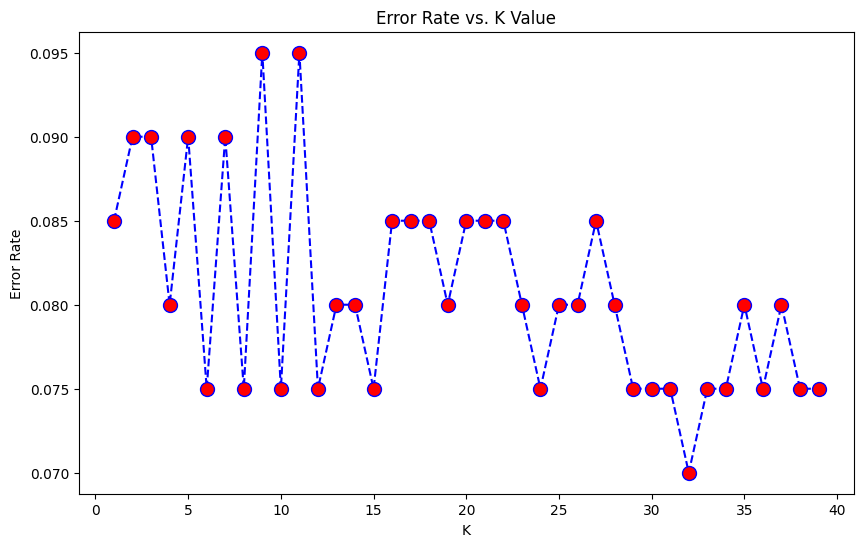

In [104]:
error_rate = []
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,Y_train)
  i_y_predict=knn.predict(X_test_scaled)
  error_rate.append(np.mean(i_y_predict != Y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy: 0.93 at K = 32


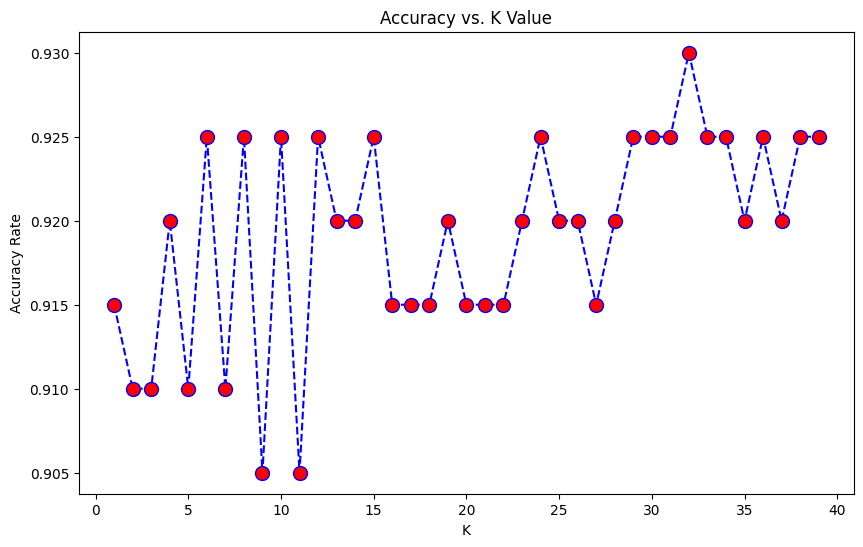

In [106]:
accuracy_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, Y_train)
    i_y_predict = knn.predict(X_test_scaled)

    # Calculate accuracy and append to accuracy_rate list
    accuracy_rate.append(np.mean(i_y_predict == Y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1, 40), accuracy_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')


max_accuracy = max(accuracy_rate)
optimal_k = accuracy_rate.index(max_accuracy) + 1

print("Maximum accuracy:", max_accuracy, "at K =", optimal_k)

## Determine the best k...based on the minimum error and maximum accuracy as indicated in the above 2 graphs

When deciding between
𝐾=31 and 𝐾=32
here’s what you should consider:

Key Points to Consider:
Accuracy vs. Error Rate:

Maximum Accuracy: You obtained the highest accuracy (0.93) at 𝐾=32
Minimum Error Rate: The lowest error rate (0.07) was found at 𝐾=31

Impact of 𝐾 on Model Stability:

Larger 𝐾
K Values: Generally, as 𝐾
K increases, the model becomes more stable because it considers more neighbors, which can help smooth out predictions and reduce the impact of noise.
Smaller 𝐾
K Values: A slightly smaller 𝐾
K might make the model more sensitive to the local structure of the data, which can be beneficial if the data has distinct clusters but might lead to overfitting if 𝐾  is too small.
The Trade-off:

K=31: Has the lowest error rate but a slightly lower accuracy. This could be due to overfitting to the training data, where the model is finely tuned to specific data points, leading to marginally higher errors on unseen data.

K=32: Has the highest accuracy and a slightly higher error rate. This suggests that it generalizes slightly better on the test data, leading to a more robust model overall.
Recommendation:
Use
K=32: Since the difference in error rate between K=31 and 𝐾=32is minimal, but
K=32 gives you the highest accuracy, it is generally better to choose the model that achieves the highest accuracy. This indicates that the model with K=32 is likely to perform better on new, unseen data.
In summary, even though
K=31 has the lowest error rate, the difference is small, and

K=32 has the highest accuracy, making it the preferable choice for a more balanced and generalizable model.

